In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model
from keras import *
from sklearn import preprocessing
#from IPython.display import SVG
#from keras.utils import model_to_dot
import keras.backend as K

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/Users/saiganesh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2.0.0


### Generate Data


### Create the Neural networks for the classification task

We are going to vary the depth of the neural network as follows (excluding the input and the output layer), with depth d=1,2,3,4,5. We are going to fix the neurons for each layer to be 6, for our classification task. Each model adds one extra hidden layer. We are using the same parameters to train all networks and we require the training error or the classification error to tend to 0 during the training procedure, i.e, we will try and overfit the data (as we try to demonstrate a representation result, rather than a statistical/generalization result). Thus, for the actual training we use the same parameters to train all the different models using "ADAM" optimizer and make the epochs to be 200 in order to enable overfitting. To record the training error, we verify that the training saturates by seeing the performance over the epochs and report by default the error in the last epoch.

#### The Classification Task

We create a classification task that is considered a smoothed version of the n-alternating points problem proposed in Telgarsky (2015), which as we show in our paper is an instance of a period 3 function. So we create 8000 equally spaced points from [0,1] (in increasing order), where the first 1000 points are of label 0, the second 1000 are label 1 and this label alternates every 1000 points. This is what we call a "smoothed" alternating point problem. Although, the theory would have used the classical 8-alternating points to argue about the lower bounds, in practice, performing training of deep (4 and above layers) and narrow networks (hidden layers with less than 4 neurons) with very few data points is a major challenge, see for instance [https://arxiv.org/pdf/1808.04947.pdf]. Apart from the separation results that we show in theory, we show empirically that deep networks generally do improve the accuracy in this task compared to the shallow network and in fact a deep network with 5 layers can reach an accuracy of 99.04%. Any addititional uncertainties in the error is generally attributed to the training procedure.

In [2]:
#Input data goes here-Generate here the classification task
n=8000 #2^10 (max depth is 10)
x_train=np.zeros((n,1))
y_train=np.zeros((n,1))
for i in range(n):
    x_train[i,0]=(i+1)/n;
    if(int(i/1000) % 2 == 0):
        y_train[i,0]=0
    else:
        y_train[i,0]=1

#### Depth d=1

In [97]:
model1 = Sequential()
model1.add(Dense(6, input_dim=1, activation='relu',
                bias_initializer='zeros'))
model1.add(Dense(6, activation='relu',bias_initializer='zeros'))
model1.add(Dense(1, activation='sigmoid'))

In [98]:
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

history=model1.fit(x_train, y_train,
          epochs=200,
          batch_size=80,verbose=1)

Epoch 1/200
8000/8000 [==============================] - 0s 45us/step - loss: 0.6930 - binary_accuracy: 0.4967
Epoch 2/200
8000/8000 [==============================] - 0s 24us/step - loss: 0.6921 - binary_accuracy: 0.5523
Epoch 3/200
8000/8000 [==============================] - 0s 23us/step - loss: 0.6908 - binary_accuracy: 0.5760
Epoch 4/200
8000/8000 [==============================] - 0s 29us/step - loss: 0.6889 - binary_accuracy: 0.5506
Epoch 5/200
8000/8000 [==============================] - 0s 24us/step - loss: 0.6866 - binary_accuracy: 0.5439
Epoch 6/200
8000/8000 [==============================] - 0s 25us/step - loss: 0.6843 - binary_accuracy: 0.5389
Epoch 7/200
8000/8000 [==============================] - 0s 24us/step - loss: 0.6822 - binary_accuracy: 0.5683
Epoch 8/200
8000/8000 [==============================] - 0s 26us/step - loss: 0.6804 - binary_accuracy: 0.5726
Epoch 9/200
8000/8000 [==============================] - 0s 24us/step - loss: 0.6788 - binary_accuracy: 0.6044
E

8000/8000 [==============================] - 0s 21us/step - loss: 0.6695 - binary_accuracy: 0.5121
Epoch 147/200
8000/8000 [==============================] - 0s 19us/step - loss: 0.6695 - binary_accuracy: 0.5100
Epoch 148/200
8000/8000 [==============================] - 0s 18us/step - loss: 0.6694 - binary_accuracy: 0.5058
Epoch 149/200
8000/8000 [==============================] - 0s 18us/step - loss: 0.6695 - binary_accuracy: 0.5042
Epoch 150/200
8000/8000 [==============================] - 0s 18us/step - loss: 0.6696 - binary_accuracy: 0.5069
Epoch 151/200
8000/8000 [==============================] - 0s 18us/step - loss: 0.6695 - binary_accuracy: 0.5073
Epoch 152/200
8000/8000 [==============================] - 0s 19us/step - loss: 0.6695 - binary_accuracy: 0.5140
Epoch 153/200
8000/8000 [==============================] - 0s 18us/step - loss: 0.6695 - binary_accuracy: 0.5048
Epoch 154/200
8000/8000 [==============================] - 0s 18us/step - loss: 0.6695 - binary_accuracy: 0.50

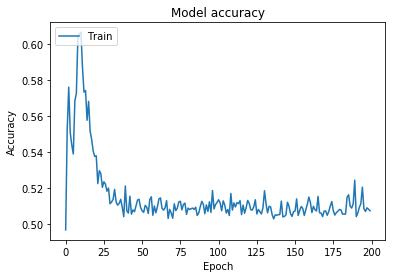

In [99]:
# Plot training & validation accuracy values
plt.plot(history.history['binary_accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

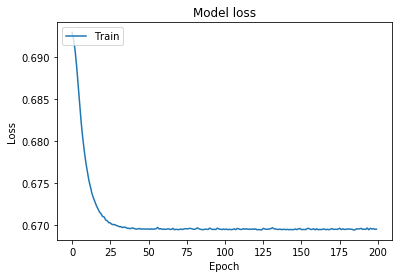

In [100]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Depth d=2

In [101]:
model2 = Sequential()
model2.add(Dense(6, input_dim=1, activation='relu',
                bias_initializer='zeros'))
model2.add(Dense(6, activation='relu',bias_initializer='zeros'))
model2.add(Dense(6, activation='relu',bias_initializer='zeros'))
model2.add(Dense(1, activation='sigmoid'))

In [102]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

history=model2.fit(x_train, y_train,
          epochs=200,
          batch_size=80,verbose=1)

Epoch 1/200
8000/8000 [==============================] - 0s 49us/step - loss: 0.7050 - binary_accuracy: 0.4378
Epoch 2/200
8000/8000 [==============================] - 0s 25us/step - loss: 0.6945 - binary_accuracy: 0.4796
Epoch 3/200
8000/8000 [==============================] - 0s 25us/step - loss: 0.6905 - binary_accuracy: 0.5529
Epoch 4/200
8000/8000 [==============================] - 0s 24us/step - loss: 0.6881 - binary_accuracy: 0.5794
Epoch 5/200
8000/8000 [==============================] - 0s 26us/step - loss: 0.6856 - binary_accuracy: 0.5175
Epoch 6/200
8000/8000 [==============================] - 0s 30us/step - loss: 0.6829 - binary_accuracy: 0.5362
Epoch 7/200
8000/8000 [==============================] - 0s 25us/step - loss: 0.6806 - binary_accuracy: 0.5809
Epoch 8/200
8000/8000 [==============================] - 0s 33us/step - loss: 0.6787 - binary_accuracy: 0.5930
Epoch 9/200
8000/8000 [==============================] - 0s 26us/step - loss: 0.6771 - binary_accuracy: 0.6025
E

8000/8000 [==============================] - 0s 25us/step - loss: 0.3960 - binary_accuracy: 0.8008
Epoch 147/200
8000/8000 [==============================] - 0s 22us/step - loss: 0.3942 - binary_accuracy: 0.7922
Epoch 148/200
8000/8000 [==============================] - 0s 23us/step - loss: 0.3936 - binary_accuracy: 0.8075
Epoch 149/200
8000/8000 [==============================] - 0s 23us/step - loss: 0.3929 - binary_accuracy: 0.8031
Epoch 150/200
8000/8000 [==============================] - 0s 23us/step - loss: 0.3926 - binary_accuracy: 0.8002
Epoch 151/200
8000/8000 [==============================] - 0s 22us/step - loss: 0.3924 - binary_accuracy: 0.7939
Epoch 152/200
8000/8000 [==============================] - 0s 23us/step - loss: 0.3921 - binary_accuracy: 0.8021
Epoch 153/200
8000/8000 [==============================] - 0s 23us/step - loss: 0.3918 - binary_accuracy: 0.7958
Epoch 154/200
8000/8000 [==============================] - 0s 23us/step - loss: 0.3907 - binary_accuracy: 0.80

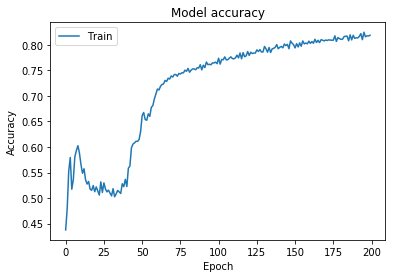

In [103]:
# Plot training & validation accuracy values
plt.plot(history.history['binary_accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

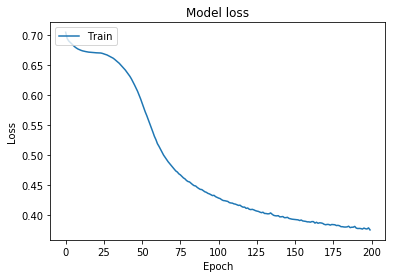

In [104]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Depth d=3

In [117]:
model3 = Sequential()
model3.add(Dense(6, input_dim=1, activation='relu',
                bias_initializer='zeros'))
model3.add(Dense(6, activation='relu',bias_initializer='zeros'))
model3.add(Dense(6, activation='relu',bias_initializer='zeros'))
model3.add(Dense(6, activation='relu',bias_initializer='zeros'))
model3.add(Dense(1, activation='sigmoid'))

In [118]:
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

history=model3.fit(x_train, y_train,
          epochs=200,
          batch_size=80,verbose=1)

Epoch 1/200
8000/8000 [==============================] - 0s 62us/step - loss: 0.6908 - binary_accuracy: 0.5614
Epoch 2/200
8000/8000 [==============================] - 0s 38us/step - loss: 0.6777 - binary_accuracy: 0.5334
Epoch 3/200
8000/8000 [==============================] - 0s 25us/step - loss: 0.6636 - binary_accuracy: 0.5351
Epoch 4/200
8000/8000 [==============================] - 0s 26us/step - loss: 0.6495 - binary_accuracy: 0.5767
Epoch 5/200
8000/8000 [==============================] - 0s 29us/step - loss: 0.6374 - binary_accuracy: 0.5674
Epoch 6/200
8000/8000 [==============================] - 0s 30us/step - loss: 0.6283 - binary_accuracy: 0.5694
Epoch 7/200
8000/8000 [==============================] - 0s 27us/step - loss: 0.6211 - binary_accuracy: 0.5673
Epoch 8/200
8000/8000 [==============================] - 0s 28us/step - loss: 0.6154 - binary_accuracy: 0.5324
Epoch 9/200
8000/8000 [==============================] - 0s 27us/step - loss: 0.6106 - binary_accuracy: 0.5148
E

8000/8000 [==============================] - 0s 27us/step - loss: 0.3333 - binary_accuracy: 0.8551
Epoch 147/200
8000/8000 [==============================] - 0s 30us/step - loss: 0.3319 - binary_accuracy: 0.8572
Epoch 148/200
8000/8000 [==============================] - 0s 28us/step - loss: 0.3324 - binary_accuracy: 0.8555
Epoch 149/200
8000/8000 [==============================] - 0s 27us/step - loss: 0.3313 - binary_accuracy: 0.8558
Epoch 150/200
8000/8000 [==============================] - 0s 27us/step - loss: 0.3314 - binary_accuracy: 0.8570
Epoch 151/200
8000/8000 [==============================] - 0s 30us/step - loss: 0.3285 - binary_accuracy: 0.8590
Epoch 152/200
8000/8000 [==============================] - 0s 27us/step - loss: 0.3284 - binary_accuracy: 0.8583
Epoch 153/200
8000/8000 [==============================] - 0s 30us/step - loss: 0.3294 - binary_accuracy: 0.8575
Epoch 154/200
8000/8000 [==============================] - 0s 28us/step - loss: 0.3292 - binary_accuracy: 0.85

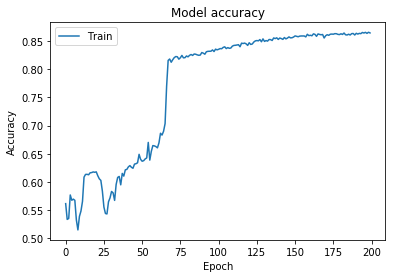

In [119]:
# Plot training & validation accuracy values
plt.plot(history.history['binary_accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

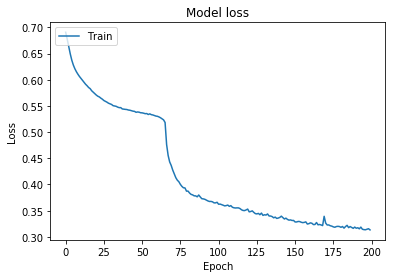

In [120]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Depth d=4

In [105]:
model4 = Sequential()
model4.add(Dense(6, input_dim=1, activation='relu',
                bias_initializer='zeros'))
model4.add(Dense(6, activation='relu',bias_initializer='zeros'))
model4.add(Dense(6, activation='relu',bias_initializer='zeros'))
model4.add(Dense(6, activation='relu',bias_initializer='zeros'))
model4.add(Dense(6, activation='relu',bias_initializer='zeros'))
model4.add(Dense(1, activation='sigmoid'))

In [106]:
model4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

history=model4.fit(x_train, y_train,
          epochs=200,
          batch_size=80,verbose=1)

Epoch 1/200
8000/8000 [==============================] - 1s 72us/step - loss: 0.6910 - binary_accuracy: 0.5320
Epoch 2/200
8000/8000 [==============================] - 0s 38us/step - loss: 0.6835 - binary_accuracy: 0.5484
Epoch 3/200
8000/8000 [==============================] - 0s 30us/step - loss: 0.6732 - binary_accuracy: 0.6014
Epoch 4/200
8000/8000 [==============================] - 0s 29us/step - loss: 0.6646 - binary_accuracy: 0.5757
Epoch 5/200
8000/8000 [==============================] - 0s 29us/step - loss: 0.6587 - binary_accuracy: 0.5571
Epoch 6/200
8000/8000 [==============================] - 0s 29us/step - loss: 0.6540 - binary_accuracy: 0.5884
Epoch 7/200
8000/8000 [==============================] - 0s 28us/step - loss: 0.6484 - binary_accuracy: 0.6031
Epoch 8/200
8000/8000 [==============================] - 0s 29us/step - loss: 0.6424 - binary_accuracy: 0.6050
Epoch 9/200
8000/8000 [==============================] - 0s 29us/step - loss: 0.6350 - binary_accuracy: 0.6122
E

8000/8000 [==============================] - 0s 29us/step - loss: 0.2763 - binary_accuracy: 0.8441
Epoch 146/200
8000/8000 [==============================] - 0s 29us/step - loss: 0.2770 - binary_accuracy: 0.8441
Epoch 147/200
8000/8000 [==============================] - 0s 31us/step - loss: 0.2778 - binary_accuracy: 0.8469
Epoch 148/200
8000/8000 [==============================] - 0s 27us/step - loss: 0.2764 - binary_accuracy: 0.8406
Epoch 149/200
8000/8000 [==============================] - 0s 30us/step - loss: 0.2744 - binary_accuracy: 0.8409
Epoch 150/200
8000/8000 [==============================] - 1s 66us/step - loss: 0.2759 - binary_accuracy: 0.8406
Epoch 151/200
8000/8000 [==============================] - 0s 54us/step - loss: 0.2799 - binary_accuracy: 0.8471
Epoch 152/200
8000/8000 [==============================] - 0s 35us/step - loss: 0.2802 - binary_accuracy: 0.8429
Epoch 153/200
8000/8000 [==============================] - 0s 42us/step - loss: 0.2782 - binary_accuracy: 0.84

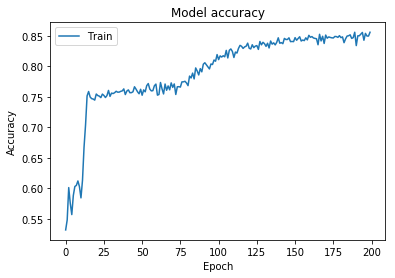

In [107]:
# Plot training & validation accuracy values
plt.plot(history.history['binary_accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

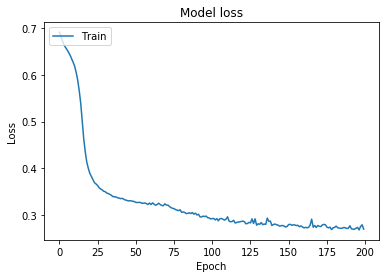

In [108]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Depth d=5

In [109]:
model5 = Sequential()
model5.add(Dense(6, input_dim=1, activation='relu',
                bias_initializer='zeros'))
model5.add(Dense(6, activation='relu',bias_initializer='zeros'))
model5.add(Dense(6, activation='relu',bias_initializer='zeros'))
model5.add(Dense(6, activation='relu',bias_initializer='zeros'))
model5.add(Dense(6, activation='relu',bias_initializer='zeros'))
model5.add(Dense(6, activation='relu',bias_initializer='zeros'))
model5.add(Dense(1, activation='sigmoid'))

In [110]:
model5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

history=model5.fit(x_train, y_train,
          epochs=200,
          batch_size=80,verbose=1)

Epoch 1/200
8000/8000 [==============================] - 1s 79us/step - loss: 0.6955 - binary_accuracy: 0.4784
Epoch 2/200
8000/8000 [==============================] - 0s 32us/step - loss: 0.6920 - binary_accuracy: 0.5738
Epoch 3/200
8000/8000 [==============================] - 0s 31us/step - loss: 0.6889 - binary_accuracy: 0.5217
Epoch 4/200
8000/8000 [==============================] - 0s 32us/step - loss: 0.6821 - binary_accuracy: 0.5477
Epoch 5/200
8000/8000 [==============================] - 0s 30us/step - loss: 0.6741 - binary_accuracy: 0.6395
Epoch 6/200
8000/8000 [==============================] - 0s 31us/step - loss: 0.6657 - binary_accuracy: 0.6332
Epoch 7/200
8000/8000 [==============================] - 0s 32us/step - loss: 0.6524 - binary_accuracy: 0.6686
Epoch 8/200
8000/8000 [==============================] - 0s 30us/step - loss: 0.6342 - binary_accuracy: 0.7082
Epoch 9/200
8000/8000 [==============================] - 0s 31us/step - loss: 0.6146 - binary_accuracy: 0.7096
E

8000/8000 [==============================] - 0s 32us/step - loss: 0.0390 - binary_accuracy: 0.9894
Epoch 147/200
8000/8000 [==============================] - 0s 32us/step - loss: 0.0370 - binary_accuracy: 0.9896
Epoch 148/200
8000/8000 [==============================] - 0s 32us/step - loss: 0.0357 - binary_accuracy: 0.9915
Epoch 149/200
8000/8000 [==============================] - 0s 41us/step - loss: 0.0438 - binary_accuracy: 0.9846
Epoch 150/200
8000/8000 [==============================] - 0s 32us/step - loss: 0.0412 - binary_accuracy: 0.9874
Epoch 151/200
8000/8000 [==============================] - 0s 31us/step - loss: 0.0389 - binary_accuracy: 0.9881
Epoch 152/200
8000/8000 [==============================] - 0s 30us/step - loss: 0.0432 - binary_accuracy: 0.9846
Epoch 153/200
8000/8000 [==============================] - 0s 32us/step - loss: 0.0425 - binary_accuracy: 0.9846
Epoch 154/200
8000/8000 [==============================] - 0s 43us/step - loss: 0.0406 - binary_accuracy: 0.98

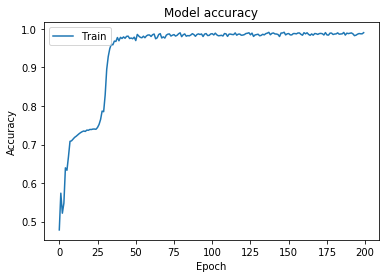

In [111]:
# Plot training & validation accuracy values
plt.plot(history.history['binary_accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

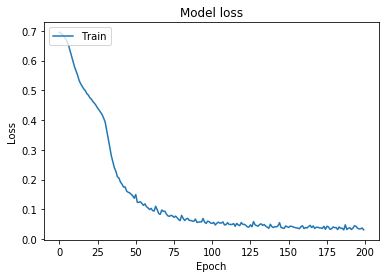

In [112]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Plot Classifcation Error vs Depth for the above classification task

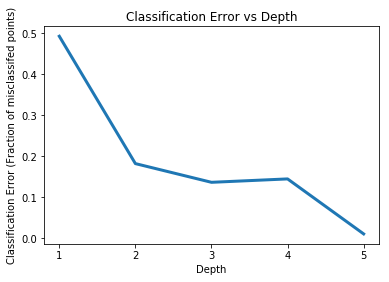

In [130]:
#The values below are obtained from the above training data. The value obtained at the last epoch.
err_task=np.array([1-0.5074,1-0.8186,1-0.8643,1-0.8560,1-0.9904])
depth=np.array([1,2,3,4,5])
plt.plot(depth,err_task,linewidth=3)
plt.title('Classification Error vs Depth')
plt.ylabel('Classification Error (Fraction of misclassifed points)')
plt.xlabel('Depth')
plt.xticks(np.arange(1, 6, 1))
plt.show()